## Dashboard

In [13]:
## Imports
import os
import panel as pn
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import requests
import pandas as pd
import datetime
import plotly.express as px
import hvplot.pandas
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from panel.interact import interact, interactive, fixed, interact_manual
pn.extension('plotly')
%matplotlib inline

In [20]:
# get combined data and read it properly
combined_file_path = Path('Resources/gold_btc.csv')
gold_btc = pd.read_csv(combined_file_path, index_col=0, parse_dates=True, infer_datetime_format=True)
gold_btc = gold_btc.iloc[1: , :]
gold_btc['GLD']=gold_btc['GLD'].astype(float)
gold_btc['BTC']=gold_btc['BTC'].astype(float)

#### Create functions to be retrieved by the dashboard

In [21]:
# def sharpe ratio function
def sharpe_ratio_calculator(portfolio):
    portfolio_returns = portfolio.pct_change().dropna()
    sharpe_ratio = (portfolio_returns.mean() * 252) / (portfolio_returns.std() * np.sqrt(252)) 
    plot_sharpe_ratio = sharpe_ratio.hvplot.bar(
    xlabel='Asset',
    ylabel='Sharpe Ratio',
    title="Sharpe Ratios")
    return plot_sharpe_ratio

In [22]:
# def riskiest asset function (standard deviation)
def risk_calculator(portfolio):
    portfolio_std = portfolio.std()  
    plot = portfolio_std.hvplot.bar(
    xlabel='Asset',
    ylabel='Standard Deviation',
    title='Risk Level',
    logy=False)
    return plot

In [23]:
# returns
def cumulative_returns(portfolio):
    returns = ((1+portfolio.pct_change()).cumprod()-1).dropna()
    plot_returns = returns.hvplot(
    xlabel='Date',
    ylabel='Return  %(x*100)'
    )
    return plot_returns

#### Configuration and build dashboard

In [24]:
#Dashboard Tabs with MC Simulations Results

column_ratios = pn.Column(
        '## Cumulative Returns', cumulative_returns(gold_btc),    
        '## Risk (Standard Deviation)', risk_calculator(gold_btc),
        '## Sharpe Ratio', 'Resources/sharpe.png')

column_1 = pn.Column(
    '## Monte Carlo Simulation | 5Y and 30Y | 100% BTC and 0% Gold', 'Resources/MC_1.1.png', 'Resources/MC_1.png')

column_2 = pn.Column(
    '## Monte Carlo Simulation | 5Y and 30Y | 75% BTC and 25% Gold', 'Resources/MC_2.1.png', 'Resources/MC_2.png')

column_3 = pn.Column(
    '## Monte Carlo Simulation | 5Y and 30Y | 50% BTC and 50% Gold', 'Resources/MC_3.1.png', 'Resources/MC_3.png')

column_4 = pn.Column(
    '## Monte Carlo Simulation | 5Y and 30Y | 25% BTC and 75% Gold', 'Resources/MC_4.1.png', 'Resources/MC_4.png')

column_5 = pn.Column(
    '## Monte Carlo Simulation | 5Y and 30Y | 0% BTC and 100% Gold', 'Resources/MC_5.1.png', 'Resources/MC_5.png')

test_drop = pn.widgets.Select(name='Portfolio Composition', options=[column_1, column_2,column_3])

sub_tabs = pn.Tabs(
    ("100% BTC - 0% Gold", column_1),
    ("75% BTC - 25% Gold", column_2),
    ("50% BTC - 50% Gold", column_3),
    ("25% BTC - 75% Gold", column_4),
    ("0% BTC - 100% Gold", column_5),
)

tabs = pn.Tabs(
    ("Ratios", column_ratios),
    ("Monte Carlo", sub_tabs)
    )

Tabs
    [0] Column
        [0] Markdown(str)
        [1] HoloViews(NdOverlay)
        [2] Markdown(str)
        [3] HoloViews(Bars)
        [4] Markdown(str)
        [5] PNG(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] PNG(str)
            [2] PNG(str)
        [1] Column
            [0] Markdown(str)
            [1] PNG(str)
            [2] PNG(str)
        [2] Column
            [0] Markdown(str)
            [1] PNG(str)
            [2] PNG(str)
        [3] Column
            [0] Markdown(str)
            [1] PNG(str)
            [2] PNG(str)
        [4] Column
            [0] Markdown(str)
            [1] PNG(str)
            [2] PNG(str)
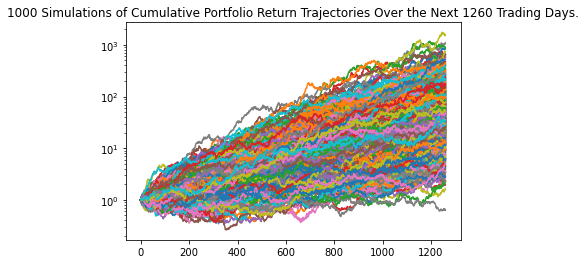
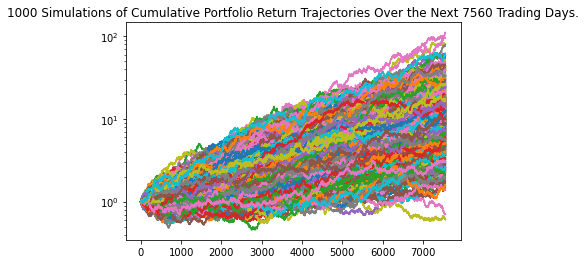
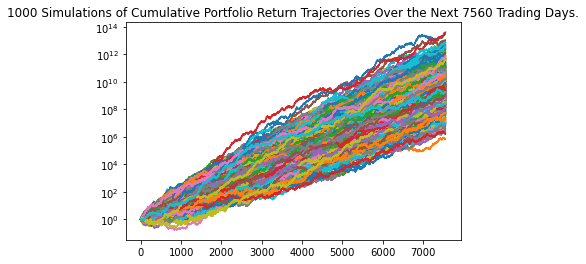
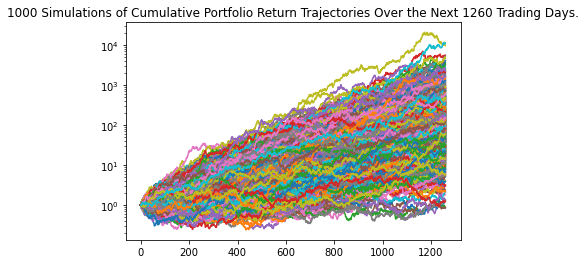
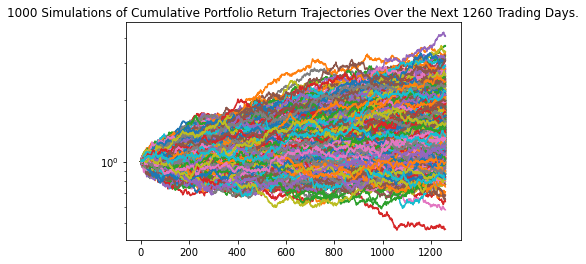
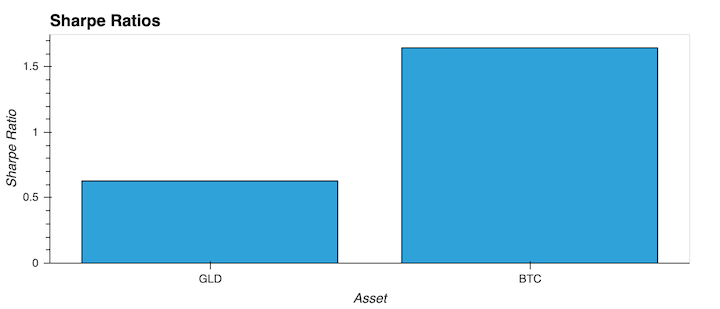
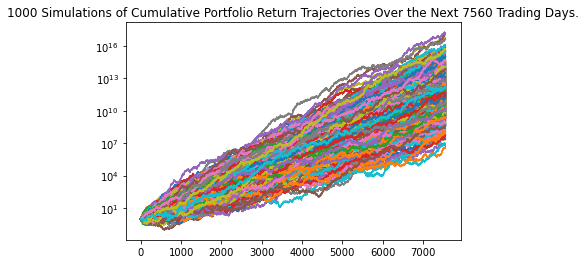
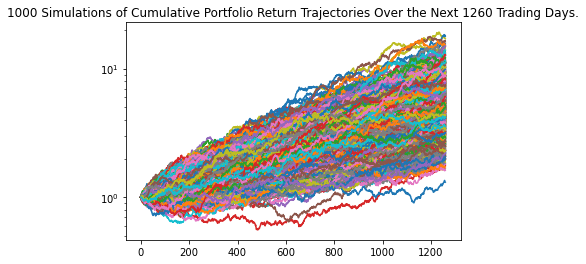
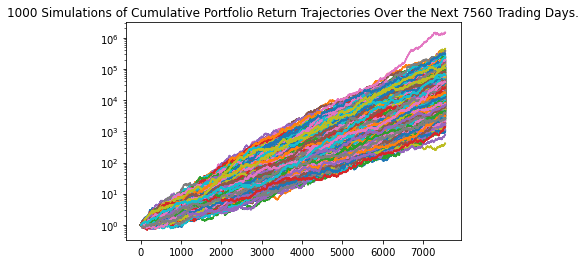
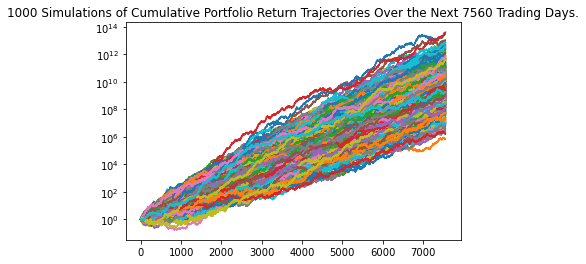
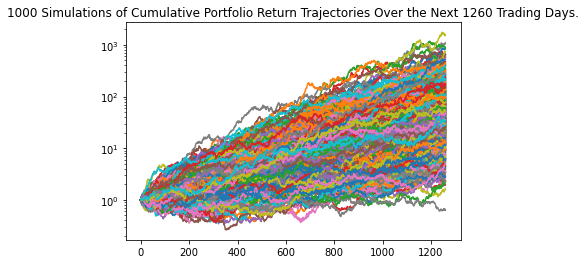

In [25]:
# Display dashboard
tabs.servable()